In [1]:
import numpy as np
import pandas as pd
import cv2
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import os
import re

In [2]:
# determine extension of images
## covid positive images
path = 'brain_tumor_dataset/brain_mri/yes'
ext_set = set()
for child in Path(path).iterdir():
    ext = Path(child).suffix
    ext_set.add(ext)
print(f'positive image extensions: {ext_set}')

## covid negative images
path = 'brain_tumor_dataset/brain_mri/no'
ext_set = set()
for child in Path(path).iterdir():
    ext = Path(child).suffix
    ext_set.add(ext)
print(f'negative image extensions: {ext_set}')

positive image extensions: {'.jpg'}
negative image extensions: {'.jpg'}


In [3]:
## postive
path = 'brain_tumor_dataset/brain_mri/yes'
pos_li = list(Path(path).glob('*.jpg'))
# pos_li.extend(list(Path(path).glob('*.JPG'))

## negative
path = 'brain_tumor_dataset/brain_mri/no'
neg_li = list(Path(path).glob('*.jpg'))
# neg_li.extend(list(Path(path).glob('*.JPG')))

# display number of images
print(f'Postive images: {len(pos_li)}\nNegative images: {len(neg_li)}')

Postive images: 154
Negative images: 91


In [4]:
# pos_li[348]

In [5]:
# create numpy array placeholder for pixels with 1 channel (grey scale)
IMG_SIZE = 128
pos_data = np.empty((len(pos_li), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
neg_data = np.empty((len(neg_li), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)
# ^ float data type must be used to save precise pixel values

In [6]:
# convert images to numpy arrays
## positive
for i, img_path in enumerate(sorted(pos_li)):
    # load image
    img = cv2.imread(str(img_path))
    # convert BGR to RGB (since CV2 reads in BGR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # resize image with 1 channel
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    # save to x_data
    pos_data[i] = img
## negative
for i, img_path in enumerate(sorted(neg_li)):
    # load image
    img = cv2.imread(str(img_path))
    # convert BGR to RGB (since CV2 reads in BGR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    # resize image with 1 channel
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    # save to x_data
    neg_data[i] = img

In [7]:
# scale image arrays
pos_data /= 255
neg_data /= 255

In [8]:
neg_data.shape

(91, 128, 128, 1)

In [9]:
pos_data.shape

(154, 128, 128, 1)

In [10]:
image = Image.open(neg_li[1])

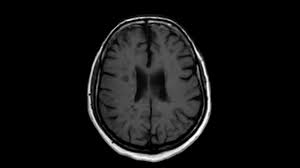

In [11]:
image

In [12]:
im = image.convert('L')

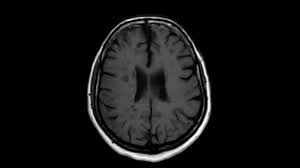

In [13]:
im

In [14]:
np.array(im)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
# rata2 = np.mean(np.array(im))

In [16]:
# rata2.shape

In [15]:
input_im = pd.DataFrame(np.array(im))

In [16]:
input_im

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from skimage.feature import greycomatrix, greycoprops

input_matrix = np.array([[0, 0, 1],
                          [1, 2, 3],
                          [2, 3, 2]])

glcm = greycomatrix(input_matrix, 
                    distances=[1], 
                    angles=[0], 
                    levels=4,
                    symmetric=True, 
                    normed=True)

print(glcm[:,:,0,0])

[[0.16666667 0.08333333 0.         0.        ]
 [0.08333333 0.         0.08333333 0.        ]
 [0.         0.08333333 0.         0.25      ]
 [0.         0.         0.25       0.        ]]


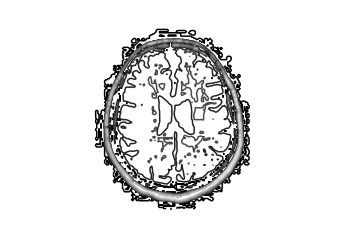

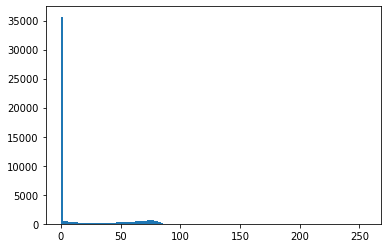

In [20]:
from pylab import *

# create a new figure
figure()
gray()
# show contours with origin upper left corner
contour(input_im, origin='image')
axis('equal')
axis('off')


figure()


hist(np.array(im).flatten(), 128)

show()

In [21]:
# from PIL import *


# figure()
# p = image.convert("L").filter(ImageFilter.GaussianBlur(radius = 2))
# p.show()